In [ ]:
import matplotlib.pyplot as plt
import os
import pandas
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns

# First CRNN results

In [ ]:
# make images folder for storing visualisations
try:
    os.mkdir('images')
except FileExistsError:
    pass

In [ ]:
class MetricShow:
    """
    Module will parse pickle file containing crnn results
    """
    def __init__(self, path):
        # path to pickle file containing metrics
        self.path = path
        # load pickle
        with open(path, 'rb') as h:
            self.metric_dict = pickle.load(h)
        # number of epochs
        self.tr_epochs = len(self.metric_dict['train_loss_history'])
        self.te_epochs = len(self.metric_dict['test_loss'])
    # find the maximum value in any metric
    def show_best(self, name, tell = True):
        """
        name: name of metric eg test_loss
        tell: (bool) if True prints peak
        """
        # get all values
        vals = list(self.metric_dict[name])
        # find maximum value
        max_val = max(vals)
        # get index of maximum value this is the epoch -1
        ep = vals.index(max_val)
        if tell:
            print(f'maximum validation accuracy: {max_val}, at epoch: {ep + 1}')
        # output epoch number and maximum value
        return ep, max_val

    def plot_metrics(self, model_name, save = False):
        """
        Plots a two panel subplot with loss on the left and accuracy curve on the right
        model_name: (str) name of model
        """
        # number of training epochs
        x_tr = range(self.tr_epochs)
        # number of validation epochs
        x_te = range(self.te_epochs)
        # Configure subplots frame
        fig, (ax0,ax1)= plt.subplots(nrows = 1, ncols=2, figsize = (10,5))
        # give overall title
        fig.suptitle(model_name)
        # in the first panel plot the train loss in orange and test loss in blue
        ax0.plot(x_tr,self.metric_dict['train_loss_history'], color = 'orange', label= 'training')
        ax0.plot(x_te,self.metric_dict['test_loss'], color = 'blue', label= 'validation')
        # place legend with labels in upper left corner
        ax0.legend(loc='upper left')
        ax0.set_title('Loss')
        ax0.set_xlabel('Epoch')
        ax0.set_ylabel('Loss')
        # plot on right panel the accuracy curves for training and validation
        ax1.plot(x_tr, self.metric_dict['train_acc_history'], color = 'orange', label = 'training')
        ax1.plot(x_te, self.metric_dict['test_acc'], color = 'blue', label = 'validation')
        ax1.legend(loc='upper left')
        ax1.set_title('Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        # if save == True then save figure in images/ with model name
        if save:
            save_path = os.path.join(os.getcwd(), 'images' , f'{model_name}.png')
            plt.savefig(save_path)

        plt.show()

    def plot_cm(self,model_name):
        """
        plots confusion matrix
        """
        # plot confusion matrix
        cm = confusion_matrix(self.metric_dict['y_true'], self.metric_dict['y_pred'])


        plt.figure(figsize=(8, 6))
        # Create heatmap
        sns.heatmap(cm, annot=True, cbar=None, fmt="d")

        plt.title(model_name), plt.tight_layout()

        plt.ylabel("True Class"),
        plt.xlabel("Predicted Class")
        plt.show()

## CRNN3
- time window 70
- same architecture

In [ ]:
crnn3_path = os.path.join(os.getcwd(), 'model_evaluation/crnn3_train_metrics.pickle')

In [ ]:
crnn3 = MetricShow(crnn3_path)

In [ ]:
crnn3.metric_dict.keys()

In [ ]:
crnn3.plot_metrics('CRNN1', save= False)

In [ ]:
crnn3.show_best('test_acc')

## CRNN5
- time window 70
- same architecture
- learning rate - 0.0001

In [ ]:
crnn5_path = os.path.join(os.getcwd(), 'model_evaluation/crnn5_train_metrics.pickle')
crnn5 = MetricShow(crnn5_path)
crnn5.plot_metrics('CRNN4', save=False)

In [ ]:
crnn5.show_best('test_acc')

## CRNN5_1
- time window 70
- same architecture
- learning rate - 0.0001
- wight decay ADAMW = 1e-2
- batchnorm at last 3d layer

In [ ]:
crnn5_1_path = os.path.join(os.getcwd(), 'model_evaluation/crnn5_1_train_metrics.pickle')
crnn5_1 = MetricShow(crnn5_1_path)
crnn5_1.plot_metrics('CRNN5', save=False)

In [ ]:
crnn5_1.show_best('test_acc')

## CRNN5_1_1
- time window 70
- same architecture
- learning rate - 0.0001
- wight decay ADAMW = 1e-2
- layer normalisation at last 3d layer
-

In [ ]:
crnn5_1_1_path = os.path.join(os.getcwd(), 'model_evaluation/crnn5_1_1_train_metrics.pickle')
crnn5_1_1 = MetricShow(crnn5_1_1_path)
crnn5_1_1.plot_metrics('CRNN5_1_1', save=False)

In [ ]:
crnn5_1_1.show_best('test_acc')

## CRNN5_3
- time window 70
- same architecture
- learning rate - 0.0001
- wight decay ADAMW = 1e-1
- batchnorm at last 3d layer

In [ ]:
crnn5_3_path = os.path.join(os.getcwd(), 'model_evaluation/crnn5_3_train_metrics.pickle')
crnn5_3 = MetricShow(crnn5_3_path)
crnn5_3.plot_metrics('CRNN3_1', save=False)

In [ ]:
crnn5_3.show_best('test_acc')

## CRNN 7_1

- crnn 7 architechure, one more GRU layer
- early stop

In [ ]:
crnn7_1_path = os.path.join(os.getcwd(), 'model_evaluation/crnn7_1_train_metrics.pickle')
crnn7_1 = MetricShow(crnn7_1_path)
crnn7_1.plot_metrics('CRNN7_1', save=False)

In [ ]:
crnn7_1.show_best('test_acc')

## CRNN 7_2

- crnn 7 architechure
- adamw optimiser
- GELU replaces Relu try SeLU next
- early stop

In [ ]:
crnn7_2_path = os.path.join(os.getcwd(), 'model_evaluation/crnn7_2_train_metrics.pickle')
crnn7_2 = MetricShow(crnn7_2_path)
crnn7_2.plot_metrics('CRNN7_1', save=False)

In [ ]:
crnn7_2.show_best('test_acc')

# Machine Learning

In [ ]:
def make_plots(metric):
    """
    metric to show
    """
    # list of all atlas names
    atlases = ['cc400', 'cc_200', 'aal', 'dosenbach160', 'tt', 'ez']
    # list of all ml names
    models = ['svm', 'xgb', 'log']
    # loop over atlases and models lists to make links to each combination
    all_links = [f'model_evaluation/{atlas}/{m}_scores.csv' for atlas in atlases for m in models]
    # splits all_links into chunks of three links
    # each chunk contain links to metrics to all models for one atlas
    split_atlas = [all_links[i:i + 3] for i in range(0, len(all_links), 3)]

    fig, axes = plt.subplots(nrows = 2, ncols=3, figsize = (10,10), sharey= True)
    # title's for all atlases
    titles = ['CC400', 'CC200' ,'AAL', 'DB160','TT', 'EZ']
    # loop over all atlases
    for i, atlas in enumerate(atlases):
        # iniatlise dictionary item, stores metrics of all models from one atlas
        atlas_metric = {}
        # loop over each sub list in split_atlas
        for j, mod in enumerate(split_atlas[i]):
            # turn each sub_list (mod) to a pd dataframe extract metrics
            # add to atlas_metric dictionary with model name as key
            atlas_metric[models[j]] = pd.read_csv(mod).loc[:, metric].values
        # turn atlas_metric to pd dataframe
        m = pd.DataFrame(atlas_metric)
        # turn m to boxplot and set model names
        axes.flat[i].boxplot(m)
        axes.flat[i].set_xticklabels(['SVC', 'XBG', 'LOG'])
        axes.flat[i].set_title(titles[i],  loc='left', fontsize= 'medium')

    plt.tick_params(axis='both', which='minor', labelsize=8)

    fig.supxlabel('Model',y=0.05, fontsize='medium')
    fig.supylabel('Accuracy',x= 0.04, fontsize='medium')

    plt.show()

In [ ]:
make_plots('test_accuracy')

# Fully connected network

In [ ]:
def cross_val_nn(path, show_mean = True, epochs = 50):
    """
    Plots cross validation results for fcn. showing mean, and standard deviation as error bars
    path: path to file containing metrics
    """
    # load metric pickle file , this is a list of dictionaries,
    # each dictionary having metric name as key, and values for one cross validation fold
    with open(path, 'rb') as f:
        nn_metrics = pickle.load(f)

    # names of each metric
    metrics = list(nn_metrics[1].keys())
    # inialise nn_array to unfurl nn_metrics values on to
    nn_array = []
    # iterate over all folds
    for i in range(10):
        # append each value from dictionary to nn_array
        # nn_array will be a nested list of size (10, 4, 20) (folds, metrics, epochs)
        nn_array.append([nn_metrics[i][k] for k in metrics])
    #elementwise mean get mean for each epoch for each epoch across folds
    # nn_mean_metrics is a (20,4) array (epochs, metrics)
    nn_mean_metrics = pd.DataFrame(np.mean(np.array(nn_array), axis=0).T, columns=metrics)
    #elementwise std, get std for each epoch across folds
    nn_error_metrics = pd.DataFrame(np.std(np.array(nn_array), axis=0).T, columns=metrics)
    # get x axis range for training and validation
    x_tr = range(epochs)
    x_te = range(epochs)
    # get training accuracy standard deviations
    trA_error = np.array([[nn_error_metrics.train_acc_history[i],
                           nn_error_metrics.train_acc_history[i]] for i in range(epochs)]).T
    # get training error standard deviations
    trL_error = np.array([[nn_error_metrics.train_loss_history[i],
                           nn_error_metrics.train_loss_history[i]] for i in range(epochs)]).T
    # get validation accuracy standard deviations
    teA_error = np.array([[nn_error_metrics.test_acc[i],
                           nn_error_metrics.test_acc[i]] for i in range(epochs)]).T
    # get validation error standard deviations
    teL_error = np.array([[nn_error_metrics.test_loss[i],
                           nn_error_metrics.test_loss[i]] for i in range(epochs)]).T

    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle('NN')
    # plot line graph with errorbar as standard deviation, for loss curve in the left panel
    ax0.errorbar(x_tr, nn_mean_metrics.loc[:epochs+1,'train_loss_history'], yerr=trL_error, color='orange', label='training')
    ax0.errorbar(x_te, nn_mean_metrics.loc[:epochs+1,'test_loss'], yerr=teL_error, color='blue', label='validation')
    ax0.legend(loc='upper left')
    ax0.set_title('Loss')
    ax0.set_xlabel('Epoch')
    ax0.set_ylabel('Loss')
     # plot line graph with errorbar as standard deviation, for accuracy curve in the right panel
    ax1.errorbar(x_tr, nn_mean_metrics.loc[:epochs+1,'train_acc_history'], yerr=trA_error, color='orange', label='training')
    ax1.errorbar(x_te, nn_mean_metrics.loc[:epochs+1,'test_acc'], yerr=teA_error, color='blue', label='validation')
    ax1.legend(loc='upper left')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    plt.show()
    # if show_mean= true , output nn_mean_metrics as well
    if show_mean:
        return nn_mean_metrics

# FCN 1
- Gelu
- dropout 0.25
- weight decay 1e2

In [ ]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_2_metrics.pickle')

# FCN 2
- Gelu
- dropout 0.5
- weight decay 1e-3

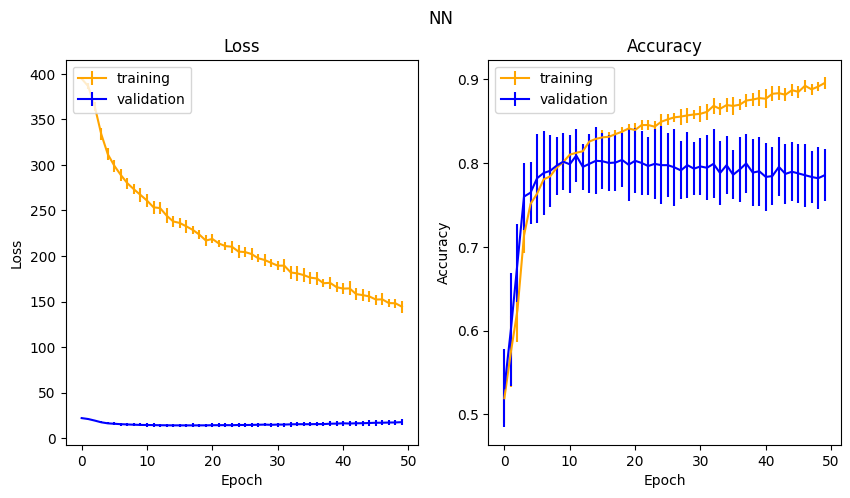

In [223]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_3_metrics.pickle')

# FCN 3
- Relu
- dropout 0.5
- weight decay 1e-2


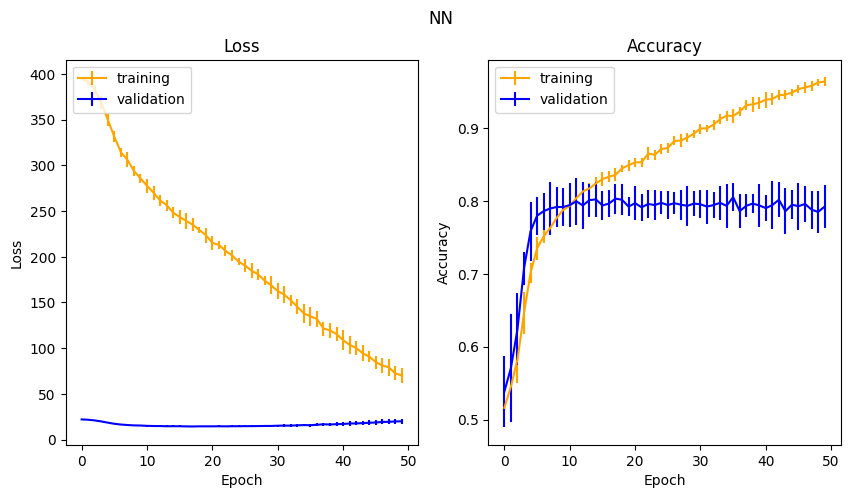

In [224]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_4_metrics.pickle')

# FCN 4
- relu
- np dropout
- weight decay 1 e-1

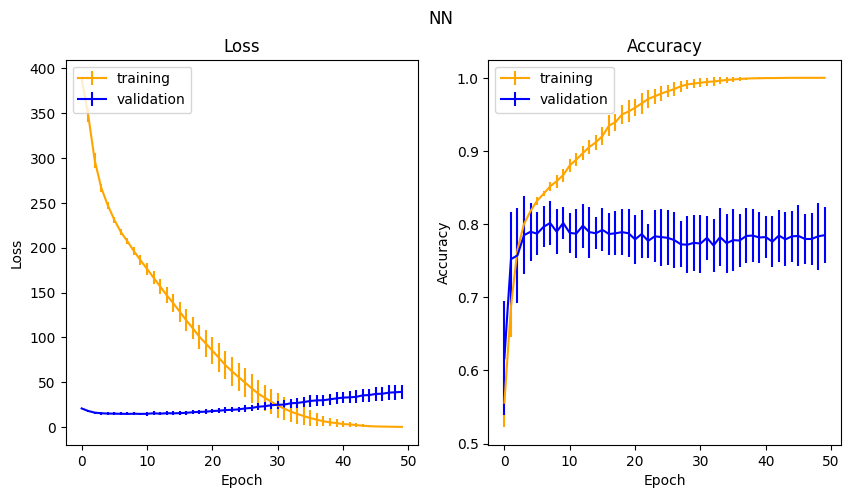

In [225]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_5_metrics.pickle')

# FCN 5
- 3 layers
- relu
- no drop
- weight decay 1e-1

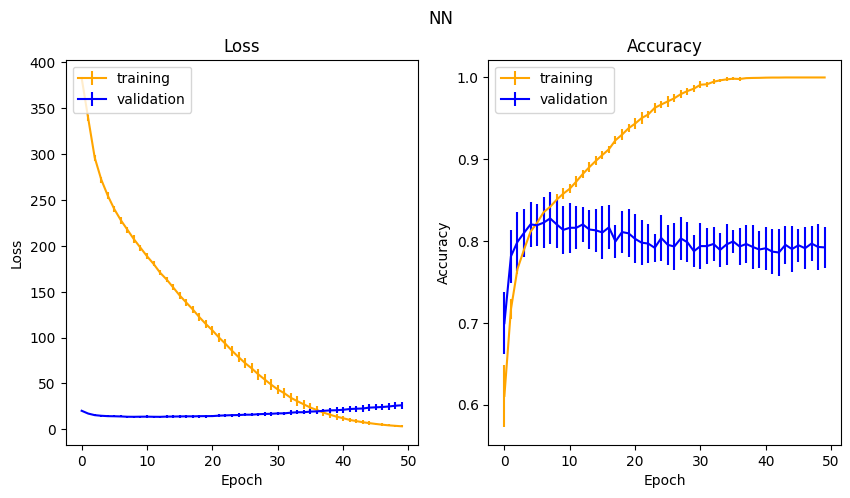

,train_acc_history,train_loss_history,test_acc,test_loss
0,0.610526,382.995285,0.699479,20.203794
1,0.716491,339.106055,0.781250,17.149568
2,0.765731,296.178575,0.798958,15.440218
3,0.789357,272.281678,0.809896,14.758644
4,0.811404,254.765295,0.820313,14.345814
5,0.822222,239.992706,0.819271,14.223606
6,0.835146,227.960051,0.822396,14.011644
7,0.841813,217.605126,0.827604,13.689423
8,0.850526,207.214376,0.820313,13.635347
9,0.857778,197.983146,0.813542,13.744583


In [233]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_6_metrics.pickle')

# FCN 6
- 3 layers
- gelu
- no drop
- weight decay 1e-1

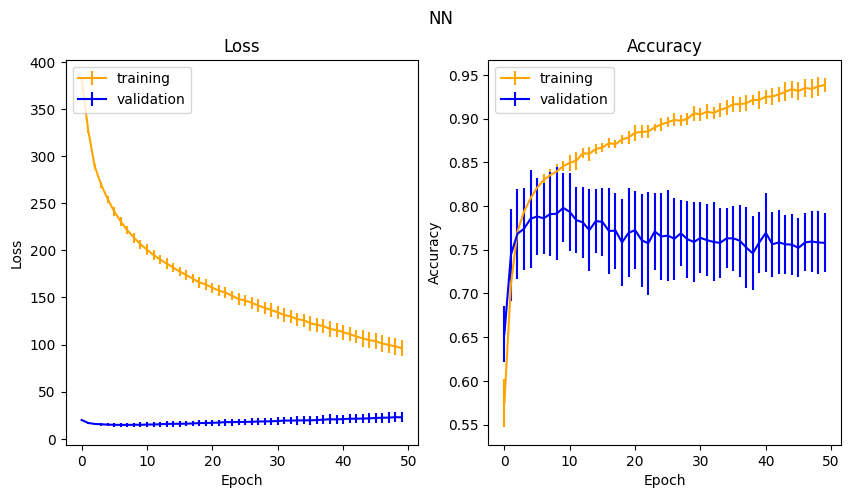

,train_acc_history,train_loss_history,test_acc,test_loss
0,0.574678,381.457778,0.653646,19.934000
1,0.710409,327.349297,0.744271,16.794832
2,0.770702,288.801936,0.768229,15.759634
3,0.793450,269.345636,0.773958,15.438005
4,0.808713,254.061207,0.785417,15.009978
5,0.820819,240.990782,0.788021,14.831923
6,0.829591,230.402338,0.785938,14.760679
7,0.835205,221.150429,0.790625,14.742367
8,0.839415,213.389376,0.791146,14.895129
9,0.845673,206.433467,0.797917,14.844253


In [234]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_7_metrics.pickle')

- 3 layers
- relu
- 1 drop at 0.25
- weight decay 1e-1

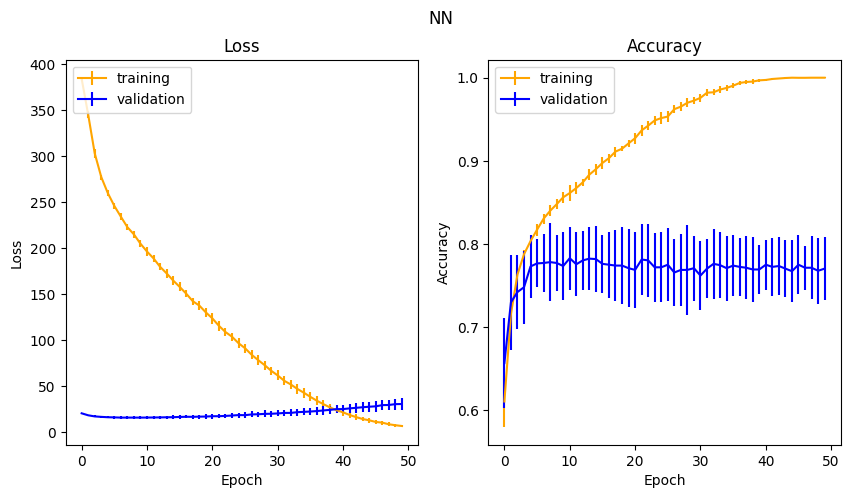

,train_acc_history,train_loss_history,test_acc,test_loss
0,0.610526,384.103544,0.656771,20.733395
1,0.715614,345.176213,0.729688,18.569144
2,0.763158,303.128293,0.742188,17.358706
3,0.787602,277.412895,0.747917,16.865275
4,0.803392,260.025637,0.772917,16.462405
5,0.817135,246.055782,0.776563,16.307623
6,0.830351,234.349045,0.777083,16.063324
7,0.839825,222.940236,0.778125,16.080165
8,0.847778,215.090524,0.777083,16.072437
9,0.856082,205.016000,0.773438,16.075896


In [236]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_8_metrics.pickle')

Gelu and drop out increases volatality with an increase in teh standard deviation between k folds

weight decay 1e-1

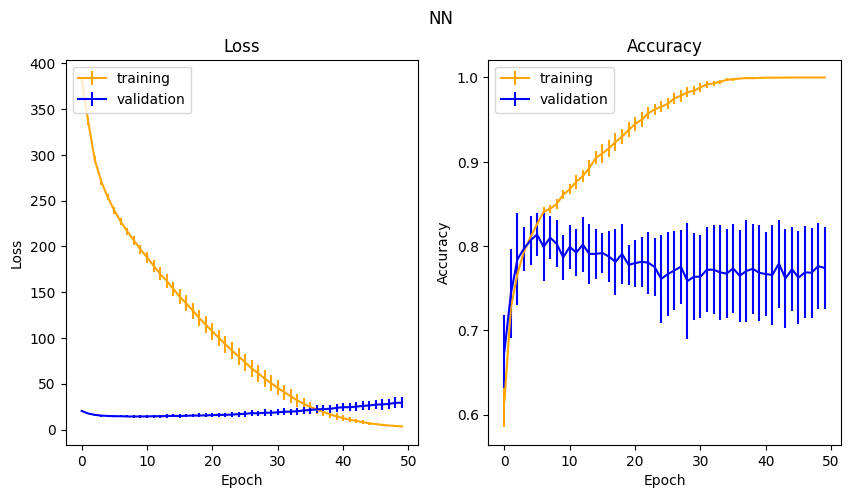

,train_acc_history,train_loss_history,test_acc,test_loss
0,0.615556,382.519693,0.675000,20.267494
1,0.727368,336.258093,0.743750,17.461358
2,0.767076,294.640950,0.784375,16.011448
3,0.793333,270.585834,0.796875,15.229842
4,0.810585,253.545485,0.806771,14.780577
5,0.826023,239.177910,0.813542,14.510514
6,0.840643,226.759136,0.798958,14.515279
7,0.844211,216.131153,0.809896,14.276377
8,0.849766,206.423329,0.802604,14.168299
9,0.861053,196.658991,0.786458,14.264813


In [239]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_11_metrics.pickle')

weight decay 1 e-2

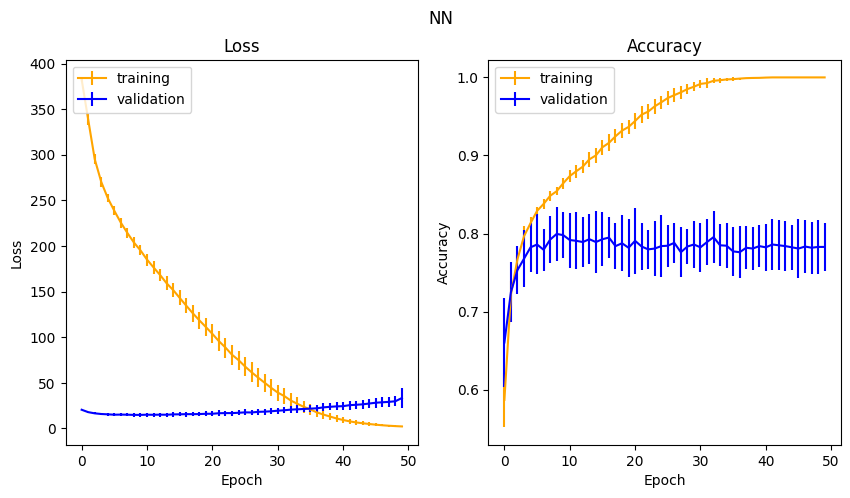

,train_acc_history,train_loss_history,test_acc,test_loss
0,0.586842,382.382218,0.660417,20.421808
1,0.722105,338.460049,0.725000,17.795690
2,0.766959,295.082898,0.753125,16.471680
3,0.796491,270.122314,0.767708,15.755183
4,0.813216,252.369185,0.782292,15.387649
5,0.829006,238.455421,0.785938,14.982485
6,0.837895,225.469034,0.779167,15.117345
7,0.848304,214.165870,0.792188,14.994031
8,0.854211,203.700307,0.799479,14.770744
9,0.864386,195.123228,0.797917,14.779873


In [14]:
cross_val_nn('/Users/admin/Documents/MscProject/model_evaluation/nn_12_metrics.pickle')

# Cross validation for CRNN

Cross validation results for the CNN-LSTM based on DFC, compared to the simple FCN based cc400

In [ ]:
# load pickle containing evaluation metrics for the fcn network
with open('/Users/admin/Documents/MscProject/model_evaluation/cc400/nn_metrics.pickle', 'rb') as f:
        cc400nn_metrics = pickle.load(f)
# load pickle containing evaluation metrics for the crnn network
with open('/Users/admin/Documents/MscProject/model_evaluation/crnn5_cv_metrics.pickle', 'rb') as f:
        crnn_metrics = pickle.load(f)

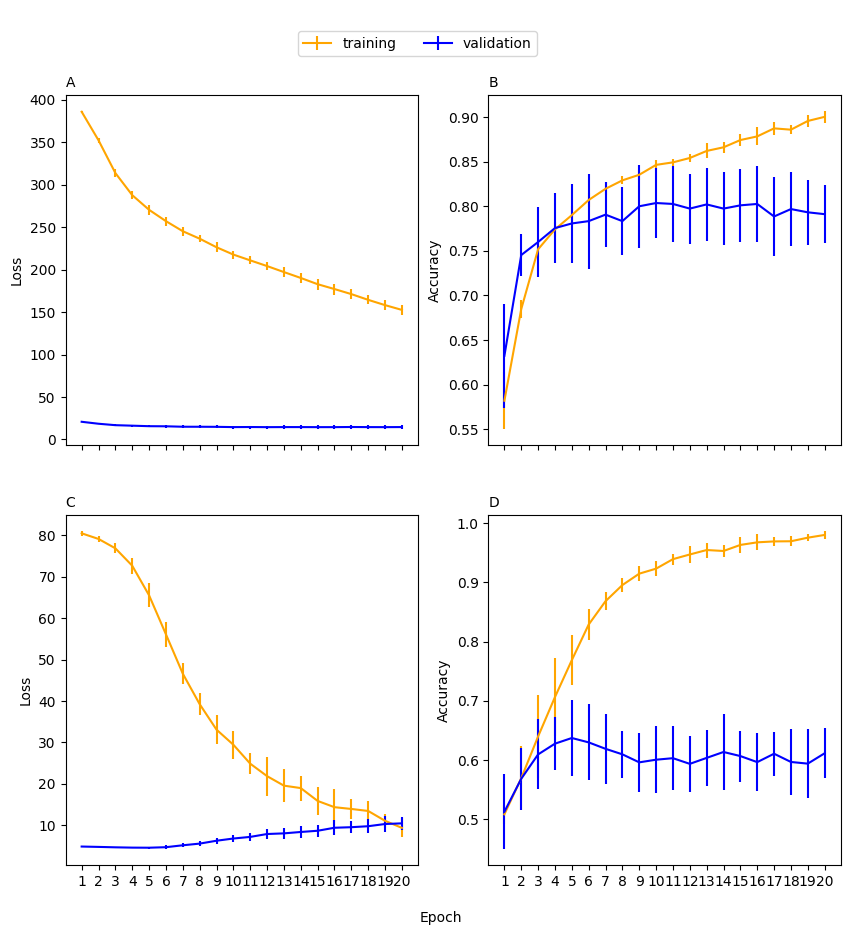

In [84]:
# get metric names
metrics = list(cc400nn_metrics[1].keys())

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,10), sharex=True)

for i,met in enumerate([cc400nn_metrics,crnn_metrics]):

    nn_array = []
    for j in range(10):
        nn_array.append([met[j][k] for k in metrics])
    mean_metrics = pd.DataFrame(np.mean(np.array(nn_array), axis=0).T, columns=metrics)[:20]
    std_metrics = pd.DataFrame(np.std(np.array(nn_array), axis=0).T, columns=metrics)[:20]

    x_tr = range(20)
    x_te = range(20)

    trA_error = np.array([[std_metrics.train_acc_history[l],
                           std_metrics.train_acc_history[l]] for l in range(20)]).T
    trL_error = np.array([[std_metrics.train_loss_history[l],
                           std_metrics.train_loss_history[l]] for l in range(20)]).T

    teA_error = np.array([[std_metrics.test_acc[l],
                           std_metrics.test_acc[l]] for l in range(20)]).T
    teL_error = np.array([[std_metrics.test_loss[l],
                           std_metrics.test_loss[l]] for l in range(20)]).T



    ax[i][0].errorbar(x_tr, mean_metrics['train_loss_history'], yerr=trL_error, color='orange', label='training')
    ax[i][0].errorbar(x_te, mean_metrics['test_loss'], yerr=teL_error, color='blue', label='validation')

    ax[i][0].set_ylabel('Loss')

    ax[i][1].errorbar(x_tr, mean_metrics['train_acc_history'], yerr=trA_error, color='orange', label='training')
    ax[i][1].errorbar(x_te, mean_metrics['test_acc'], yerr=teA_error, color='blue', label='validation')
    ax[i][1].set_ylabel('Accuracy')
    ax[0,0].set_title('A', loc='left', fontsize= 'medium')
    ax[0,1].set_title('B', loc='left', fontsize= 'medium')
    ax[1,0].set_title('C', loc='left', fontsize= 'medium')
    ax[1,1].set_title('D', loc='left', fontsize= 'medium')
    ax[1,1].set_xticks(range(0,20))
    ax[1,1].set_xticklabels(range(1,21))

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
fig.supxlabel('Epoch',y=0.05, fontsize='medium')

lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines[:2], labels[:2], loc=(0.35,0.94), ncol=2)
plt.show()